In [50]:
#importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
sns.set()

In [24]:
#Read the dataset and store it in a dataframe
df=pd.read_csv('./data/dataset.csv', sep=',')
df

,disc_number,duration_ms,explicit,track_number,track_popularity,track_id,track_name,audio_features.danceability,audio_features.energy,audio_features.key,...,audio_features.tempo,audio_features.id,audio_features.time_signature,artist_id,artist_name,artist_popularity,album_id,album_name,album_release_date,album_total_tracks
0,1,212600,False,1,77,4WUepByoeqcedHoYhSNHRt,Welcome To New York (Taylor's Version),0.757,0.610,7.0,...,116.998,4WUepByoeqcedHoYhSNHRt,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,1o59UpKw81iHR0HPiSkJR0,1989 (Taylor's Version) [Deluxe],2023-10-27,22
1,1,231833,False,2,78,0108kcWLnn2HlH2kedi1gn,Blank Space (Taylor's Version),0.733,0.733,0.0,...,96.057,0108kcWLnn2HlH2kedi1gn,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,1o59UpKw81iHR0HPiSkJR0,1989 (Taylor's Version) [Deluxe],2023-10-27,22
2,1,231000,False,3,79,3Vpk1hfMAQme8VJ0SNRSkd,Style (Taylor's Version),0.511,0.822,11.0,...,94.868,3Vpk1hfMAQme8VJ0SNRSkd,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,1o59UpKw81iHR0HPiSkJR0,1989 (Taylor's Version) [Deluxe],2023-10-27,22
3,1,235800,False,4,78,1OcSfkeCg9hRC2sFKB4IMJ,Out Of The Woods (Taylor's Version),0.545,0.885,0.0,...,92.021,1OcSfkeCg9hRC2sFKB4IMJ,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,1o59UpKw81iHR0HPiSkJR0,1989 (Taylor's Version) [Deluxe],2023-10-27,22
4,1,193289,False,5,77,2k0ZEeAqzvYMcx9Qt5aClQ,All You Had To Do Was Stay (Taylor's Version),0.588,0.721,0.0,...,96.997,2k0ZEeAqzvYMcx9Qt5aClQ,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,1o59UpKw81iHR0HPiSkJR0,1989 (Taylor's Version) [Deluxe],2023-10-27,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,1,201106,False,11,70,1j6gmK6u4WNI33lMZ8dC1s,Our Song,0.668,0.672,2.0,...,89.011,1j6gmK6u4WNI33lMZ8dC1s,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,5eyZZoQEFQWRHkV2xgAeBw,Taylor Swift,1989-10-24,Thirteen
535,1,213053,False,12,60,7CzxXgQXurKZCyHz9ufbo1,I'm Only Me When I'm With You,0.563,0.934,8.0,...,143.964,7CzxXgQXurKZCyHz9ufbo1,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,5eyZZoQEFQWRHkV2xgAeBw,Taylor Swift,1989-10-24,Thirteen
536,1,203226,False,13,58,1k3PzDNjg38cWqOvL4M9vq,Invisible,0.612,0.394,7.0,...,96.001,1k3PzDNjg38cWqOvL4M9vq,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,5eyZZoQEFQWRHkV2xgAeBw,Taylor Swift,1989-10-24,Thirteen
537,1,220146,False,14,58,0YgHuReCSPwTXYny7isLja,A Perfectly Good Heart,0.483,0.751,4.0,...,156.092,0YgHuReCSPwTXYny7isLja,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,5eyZZoQEFQWRHkV2xgAeBw,Taylor Swift,1989-10-24,Thirteen


# Timeliness
---
Debido a que se desea verificar si el dataset se encuentra dentro de los periodos de tiempo correctos se debe revisar los valores de las columnas que sean tipo datetime, en este caso unicamnete la columna `album_release_date` es de este tipo, por lo que se revisa que los valores de esta columna se encuentren dentro del rango de tiempo.

Para este caso, recordando que se analizan las canciones de la artista de musica pop Taylor Swift, se sabe que su primer album fue lanzado en el año 2006, especificamente el 24 de octubre de ese año según varias fuentes de información externa, este album es como Taylor Swift, por lo que se revisa que los valores de la columna `album_release_date` sean mayores o iguales a esta fecha.

In [25]:
df['album_release_date'] = pd.to_datetime(df['album_release_date'])
df=df.sort_values(by='album_release_date')
df['album_release_date'].min()

Timestamp('1989-10-24 00:00:00')

Al encontrar la fecha mínima de la columna `album_release_date` se obtiene que el valor mínimo es `1989-10-24`, esto se encuentra fuera del rango de tiempo que se desea analizar, y además es inconsistente debido a que la artista nació ese mismo año. Por tanto se concluye que si hay registros que temporalmente son incorrectos. Para ver de manera más clara los valores de la columna `album_release_date` se muestra el siguiente grafico.

Text(20, 20, 'Some Text')

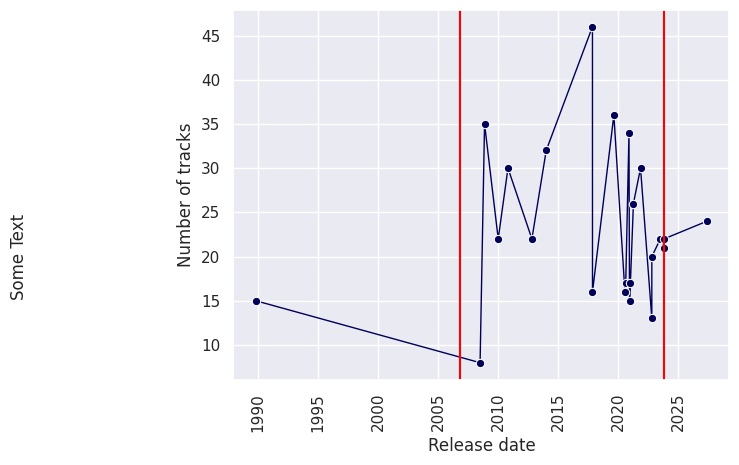

In [63]:

ax=sns.lineplot(x='album_release_date', y='album_id', data=df.groupby('album_release_date').count().reset_index(), markers=True, marker='o',
             color='#000059', linewidth=1)
plt.xticks(rotation=90)
plt.ylabel('Number of tracks')
plt.xlabel('Release date')
ax.axvline(x=datetime.datetime.strptime('2006-10-24', '%Y-%m-%d'), color='#ff0000', linestyle='-', label='2017')
ax.axvline(x=datetime.datetime.strptime('2023-10-27', '%Y-%m-%d'), color='#ff0000', linestyle='-', label='2017')

Los gráficos muestran además que existen otras inconsistencias en los datos, como por ejemplo que existen canciones que fueron lanzados después de la fecha actual, lo cual es imposible, según fuentes externas se conoce que el último album de la artista fue lanzado en el año 2023, '1989 (Taylors Version)' de fecha 27 de octubre de 2023.

In [6]:
df['album_release_date'].max()

Timestamp('2027-05-26 00:00:00')

Procedemos a contar la cantidad de registros que se encuentran en el rango de tiempo correcto.

In [65]:
max_date = datetime.datetime.strptime('2023-10-27', '%Y-%m-%d')# date of last track release
min_date = datetime.datetime.strptime('2006-10-24', '%Y-%m-%d')# date of first track release

In [70]:
df

,disc_number,duration_ms,explicit,track_number,track_popularity,track_id,track_name,audio_features.danceability,audio_features.energy,audio_features.key,...,audio_features.tempo,audio_features.id,audio_features.time_signature,artist_id,artist_name,artist_popularity,album_id,album_name,album_release_date,album_total_tracks
538,1,179066,False,15,58,1hxLyjC9D9Jpw6EAPKqWv4,Teardrops on My Guitar - Pop Version,0.459,0.753,10.0,...,199.997,1hxLyjC9D9Jpw6EAPKqWv4,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,5eyZZoQEFQWRHkV2xgAeBw,Taylor Swift,1989-10-24,Thirteen
524,1,210251,True,1,82,0Jlcvv8IykzHaSmj49uNW8,the 1,0.777,0.357,0.0,...,139.883,0Jlcvv8IykzHaSmj49uNW8,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,5eyZZoQEFQWRHkV2xgAeBw,Taylor Swift,1989-10-24,Thirteen
525,1,173066,False,2,66,4BYejINgfZF0qKDMEH2cim,Picture To Burn,0.658,0.877,7.0,...,105.586,4BYejINgfZF0qKDMEH2cim,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,5eyZZoQEFQWRHkV2xgAeBw,Taylor Swift,1989-10-24,Thirteen
526,1,203040,False,3,65,2TF4UtYreqNbQ6Z9AccldU,Teardrops On My Guitar - Radio Single Remix,0.621,0.417,10.0,...,99.953,2TF4UtYreqNbQ6Z9AccldU,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,5eyZZoQEFQWRHkV2xgAeBw,Taylor Swift,1989-10-24,Thirteen
527,1,199200,False,4,60,1oR4MUBpyNrAViC8wPNpfm,A Place in this World,0.576,0.777,9.0,...,115.028,1oR4MUBpyNrAViC8wPNpfm,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,5eyZZoQEFQWRHkV2xgAeBw,Taylor Swift,1989-10-24,Thirteen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,1,174782,False,6,70,4eKMqf9ZMSclDX7V9Ptg7x,Midnight Rain,0.654,0.372,0.0,...,140.150,4eKMqf9ZMSclDX7V9Ptg7x,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,1fnJ7k0bllNfL1kVdNVW1A,Midnights (The Til Dawn Edition),2027-05-26,24
69,1,194206,False,5,70,6PQOU00xWNrGwCZzboriXy,"You're On Your Own, Kid",0.694,0.386,2.0,...,120.044,6PQOU00xWNrGwCZzboriXy,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,1fnJ7k0bllNfL1kVdNVW1A,Midnights (The Til Dawn Edition),2027-05-26,24
68,1,256124,True,4,68,7GA86Uo2jYbj8vIXe2nyWd,Snow On The Beach (feat. Lana Del Rey),0.653,0.331,9.0,...,110.014,7GA86Uo2jYbj8vIXe2nyWd,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,1fnJ7k0bllNfL1kVdNVW1A,Midnights (The Til Dawn Edition),2027-05-26,24
65,1,202395,True,1,70,24emu3sabKISjRkrys28jq,Lavender Haze,0.735,0.454,7.0,...,97.043,24emu3sabKISjRkrys28jq,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,1fnJ7k0bllNfL1kVdNVW1A,Midnights (The Til Dawn Edition),2027-05-26,24


In [72]:
column_date = df['album_release_date']
len(column_date[column_date > max_date])

24

In [8]:
column_date = df['album_release_date']
len(column_date[(column_date > min_date) & (column_date < max_date)])
print('Number of tracks released between 2006 and 2023: ', len(column_date[(column_date > min_date) & (column_date < max_date)]))
print('Percentage of tracks released between 2006 and 2023: {:.2f}% '.format(len(column_date[(column_date > min_date) & (column_date < max_date)]) / len(column_date)*100))

Number of tracks released between 2006 and 2023:  478
Percentage of tracks released between 2006 and 2023: 88.68% 


Se concluye que el porcentaje de registros que se encuentran en el rango de tiempo correcto es de $88.68\%$, el cual corresponde a los registros que se encuentran entre las fechas `2006-10-24` y `2023-10-27` fechas del primer y último album de la artista respectivamente.